# How can we build a Python-based machine learning model to optimize retail product prices—using features like historical sales, competitor prices, seasonality, and product attributes—to maximize revenue and profit?

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df=pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\sudents and projects\S4\Reression\retail\retail_price.csv")

In [11]:
# Step 2: Drop Unnecessary Columns
df.drop(columns=["product_id", "month_year"], axis=1, inplace=True, errors='ignore')

In [13]:
# Step 3: Encode Categorical Variables
if 'product_category_name' in df.columns:
    df['product_category_name'] = LabelEncoder().fit_transform(df['product_category_name'])

In [15]:
# Step 4: Handle Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)

In [17]:
# Step 5: Feature and Target
X = df.drop("unit_price", axis=1)
y = df["unit_price"]

In [19]:
# Step 6: Scale Features
X_scaled = StandardScaler().fit_transform(X)

In [21]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
# Step 8: Define Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [25]:
# Step 9: Train, Predict and Evaluate
print("🔍 Regression Results:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  ✅ RMSE: {rmse:.2f}")
    print(f"  ✅ R² Score: {r2:.4f}\n")

🔍 Regression Results:

Linear Regression:
  ✅ RMSE: 8.14
  ✅ R² Score: 0.9877

Ridge Regression:
  ✅ RMSE: 8.13
  ✅ R² Score: 0.9878

Lasso Regression:
  ✅ RMSE: 7.99
  ✅ R² Score: 0.9882



C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest:
  ✅ RMSE: 6.81
  ✅ R² Score: 0.9914

XGBoost:
  ✅ RMSE: 6.92
  ✅ R² Score: 0.9911



C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
     "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
    
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R²': r2}
    print(f"{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.4f}\n")

Linear Regression:
  RMSE: 8.14
  R² Score: 0.9877

Ridge Regression:
  RMSE: 8.13
  R² Score: 0.9878

Random Forest:
  RMSE: 6.81
  R² Score: 0.9914

XGBoost:
  RMSE: 6.92
  R² Score: 0.9911



NameError: name 'plt' is not defined

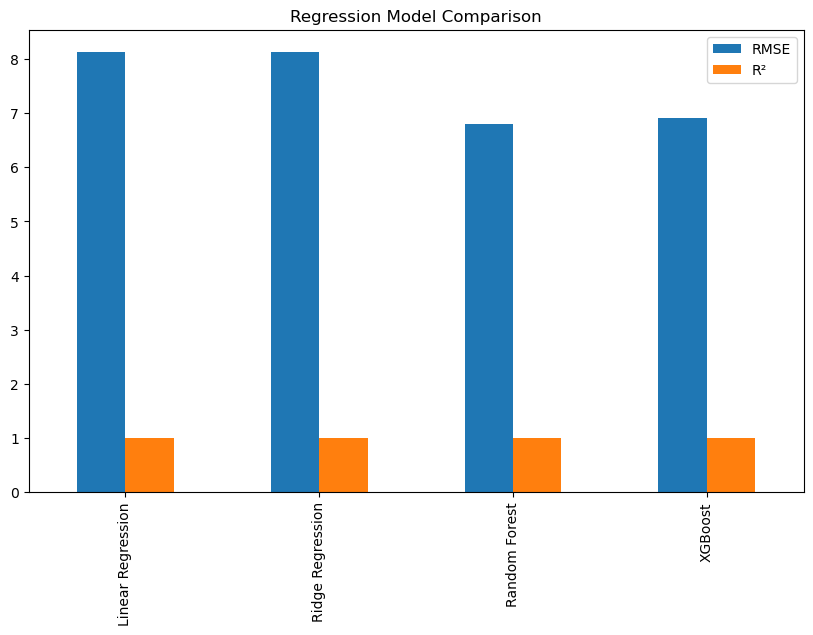

In [31]:
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10,6), title='Regression Model Comparison')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()